<a href="https://colab.research.google.com/github/sowndsgood/LinearAlgebra/blob/main/EigenValuesVectors/EigenValuesVectors_Notebook5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

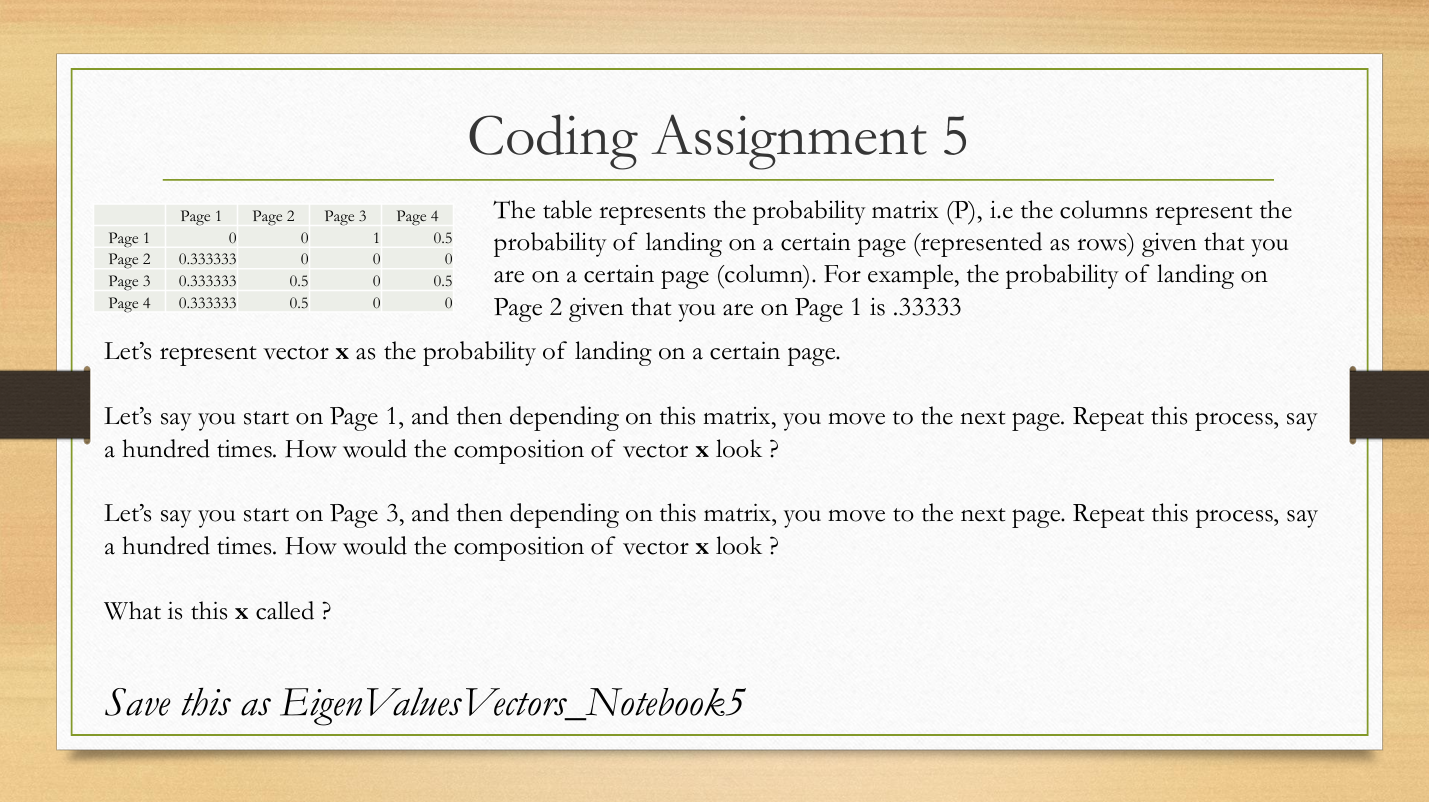

#Solution Summary:


1. **Import Libraries:** NumPy is imported as `np`.

2. **Transition Probabilities:** Transition probabilities between different states are defined in a list and converted to a NumPy array `P`.

3. **Initial Distribution:** The function `initial_distribution(starting_page)` initializes the initial distribution vector with zeros and sets the probability of starting from the specified page to 1.

4. **Matrix Multiplication Function:** The function `matrix_multiply(A, B)` performs matrix multiplication between matrices `A` and `B`, handling both matrices and vectors.

5. **Iterate Probabilities Function:** The function `iterate_probabilities(P, x, iterations)` iterates over the specified number of iterations, updating the distribution vector `x` by multiplying it with the transition matrix `P`.

6. **Iterate and Print Results:** The script sets the number of iterations, iterates over the probabilities for both initial distribution vectors `x` and `y`, and prints the resulting distribution vectors after the specified number of iterations.



###Importing Libraries:

In [21]:
# Importing the numpy library and aliasing it as np
import numpy as np

###Define the Transition Probabilities:

In [22]:
transition_probabilities = [
    [0,      0,    1,     0.5],  # Transition probabilities from Page 1
    [0.33333, 0,    0,     0  ],  # Transition probabilities from Page 2
    [0.33333, 0.5,  0,     0.5],  # Transition probabilities from Page 3
    [0.33333, 0.5,  0,     0  ]   # Transition probabilities from Page 4
]

In [23]:
# Convert to NumPy array
P = np.array(transition_probabilities)

In [24]:
# Print the probability matrix
print("Probability Matrix P:")
print(P)

Probability Matrix P:
[[0.      0.      1.      0.5    ]
 [0.33333 0.      0.      0.     ]
 [0.33333 0.5     0.      0.5    ]
 [0.33333 0.5     0.      0.     ]]


###Define the Initial Distribution Vectors:

In [25]:
def initial_distribution(starting_page):

    # Initialize the initial distribution vector with zeros
    x = np.zeros(4)

    # Set the probability of starting from the specified page to 1
    x[starting_page - 1] = 1

    return x

In [26]:
starting_page = 1
x1 = initial_distribution(starting_page)
print("Initial distribution vector for starting from Page", starting_page, ":")
print(x1)

Initial distribution vector for starting from Page 1 :
[1. 0. 0. 0.]


In [27]:
starting_page = 3
x3 = initial_distribution(starting_page)
print("Initial distribution vector for starting from Page", starting_page, ":")
print(x3)

Initial distribution vector for starting from Page 3 :
[0. 0. 1. 0.]


###Other way to define initial distribution vector:

In [8]:
'''
# Define the initial distribution vector for starting from Page 1
x1 = np.array([1, 0, 0, 0])  # Starting on Page 1

# Print the initial distribution vector
print("Initial distribution vector for starting from Page 1:")
print(x1)

'''

Initial distribution vector for starting from Page 1:
[1 0 0 0]


In [9]:
'''
# Define the initial distribution vector for starting from Page 3
x3 = np.array([0, 0, 1, 0])  # Starting on Page 3

# Print the initial distribution vector
print("Initial distribution vector for starting from Page 3:")
print(x3)

'''

Initial distribution vector for starting from Page 3:
[0 0 1 0]


###Matrix Multiplication:

In [29]:
def matrix_multiply(A, B):
    result = []
    no_of_rows_in_result = len(A)
    no_of_cols_in_result = len(B[0]) if type(B[0]) == 'list' else 1

    # Number of columns in A should be equal to number of rows in B for matrix multiplication
    if len(A[0]) != len(B):
        print("Matrix multiplication not possible")
    else:
        # Iterate through each row of A matrix
        for i in range(no_of_rows_in_result):
            # Check if the Bmatrix is a vector or not
            if no_of_cols_in_result > 1:
                temp_row = []
                # Iterate through each column of B matrix
                for j in range(no_of_cols_in_result):
                    sum = 0
                    # Multiply each row of A with each column of B
                    for k in range(len(A[0])):
                        sum += A[i][k] * B[k][j]
                    temp_row.append(sum)
                result.append(temp_row)
            else:
                sum= 0
                # Multiply each row of A with B
                for k in range(len(A[0])):
                    sum += A[i][k] * B[k]
                result.append(sum)
    return result

###Iterate Probabilities:

In [20]:
def iterate_probabilities(P,x, iterations):

    # Iterate for the specified number of iterations
    for _ in range(iterations):
        # Update x by multiplying with the transition matrix P
        x =matrix_multiply(P,x)

    return x

iterations = 100

resulting_distribution = iterate_probabilities(P, x1, iterations)
print("Resulting distribution vector after", iterations, "iterations:")
print(resulting_distribution)


resulting_distribution = iterate_probabilities(P, x3, iterations)
print("Resulting distribution vector after", iterations, "iterations:")
print(resulting_distribution)

Resulting distribution vector after 100 iterations:
[0.38694672101146316, 0.1289814497991593, 0.29020901097810314, 0.19347242434190945]
Resulting distribution vector after 100 iterations:
[0.3869482188796667, 0.1289819490855003, 0.2902101343752695, 0.19347317327238733]


##Conclusion:

This final probability distribution is often referred to as the "steady-state vector" or "stationary distribution" of the Markov chain defined by the transition matrix
𝑃
P. It represents the long-term behavior of the system, where the probabilities of being on each page stabilize and no longer change significantly with further iterations.